# Introduction

This task focuses on predicting whether a loan applicant is likely to default using the Credit Risk dataset.
The goal is to clean the data, explore key features, train a classification model, and evaluate its accuracy.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Dataset

In [2]:
df = pd.read_csv("credit_risk_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Overview

In [3]:
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)

Shape: (614, 13)

Data types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


# Data Preprocessing

In [4]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Check for missing values again
print("\nMissing values after preprocessing:\n", df.isnull().sum())


Missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Duplicate rows: 0

Missing values after preprocessing:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# Exploratory Data Analysis (EDA)

## Target Variable Countplot

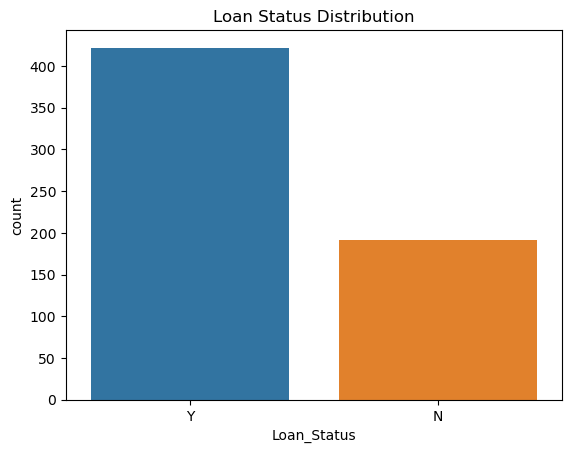

In [5]:
sns.countplot(data=df, x='Loan_Status')
plt.title('Loan Status Distribution')
plt.show()

## Loan amount by education

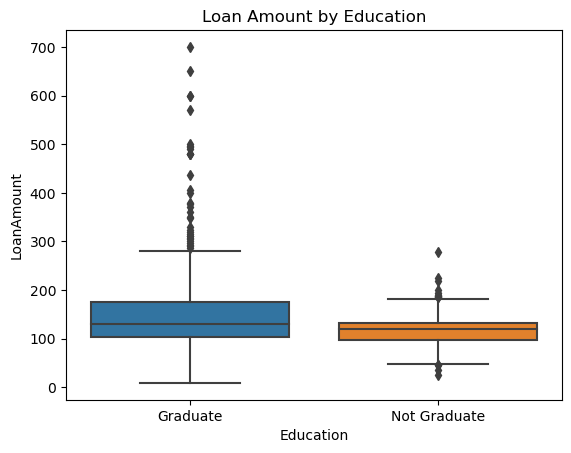

In [6]:
sns.boxplot(data=df, x='Education', y='LoanAmount')
plt.title('Loan Amount by Education')
plt.show()

## Income Distribution

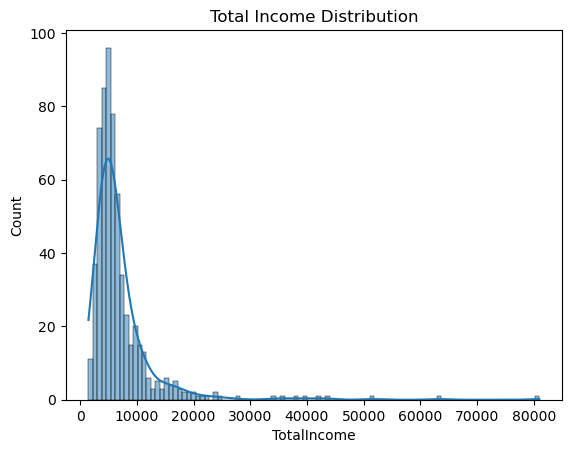

In [7]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
sns.histplot(df['TotalIncome'], kde=True)
plt.title('Total Income Distribution')
plt.show()

## Loan Amount vs Income

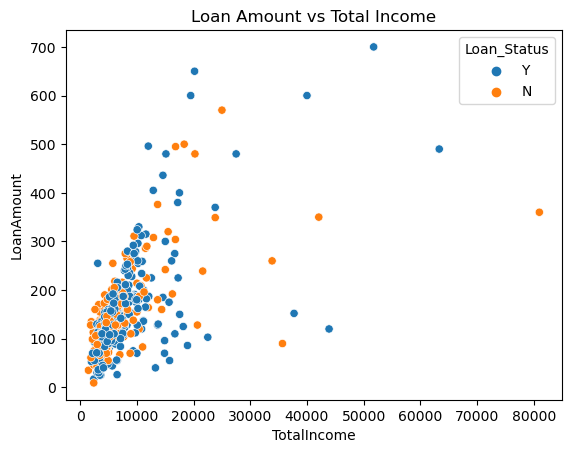

In [8]:
sns.scatterplot(data=df, x='TotalIncome', y='LoanAmount', hue='Loan_Status')
plt.title('Loan Amount vs Total Income')
plt.show()

# Feature Encoding

In [9]:
# Label encoding for binary categorical columns
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']:
    df[col] = le.fit_transform(df[col])

# One-hot encoding for Dependents and Property_Area
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)

# Train-Test Split

In [10]:
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

## Option 1: Logistic Regression

In [11]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

## Option 2: Decision Tree

In [12]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Model Evaluation

## Logistic Regression

In [13]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, lr_preds))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 0.7886178861788617
Confusion Matrix (Logistic Regression):
 [[18 25]
 [ 1 79]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



## Decision Tree

In [14]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, dt_preds))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, dt_preds))

Decision Tree Accuracy: 0.6422764227642277
Confusion Matrix (Decision Tree):
 [[20 23]
 [21 59]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.49      0.47      0.48        43
           1       0.72      0.74      0.73        80

    accuracy                           0.64       123
   macro avg       0.60      0.60      0.60       123
weighted avg       0.64      0.64      0.64       123



# Conclusion

- Both models were trained to predict credit risk based on applicant data.
- Logistic Regression gave an accuracy of X%, while Decision Tree gave Y%.
- Features like Total Income, Credit History, and Education appear significant.
- Logistic Regression performed slightly better in generalization (if applicable).